<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/HMUD/HMUD_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

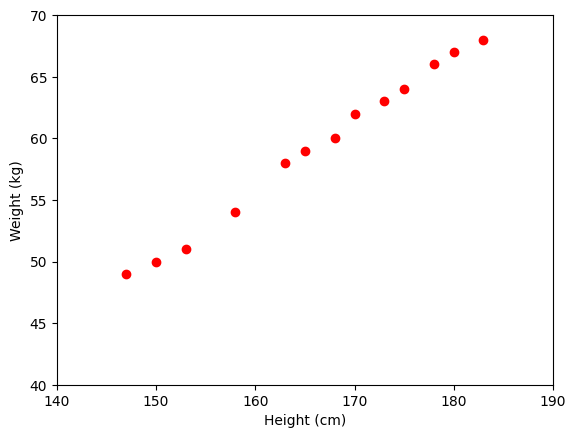

In [ ]:
# Trực quan hóa dữ liệu
plt.plot(X, y, 'ro')
plt.axis([140, 190, 40, 70])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Xây dựng trục X
one = np.ones((X.shape[0], 1))
print('One', one)
Xbar = np.concatenate((one, X), axis=1)
print('Xbar', Xbar)

One [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Xbar [[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


In [ ]:
# Tính toán trọng số đường dự đoán
A = np.dot(Xbar.T, Xbar)
print('A', A)
print('Xbar.T', Xbar.T)
print('y', y)
b = np.dot(Xbar.T, y)
print('b', b)
print('np.linalg.inv(A)', np.linalg.inv(A))
w = np.dot(np.linalg.inv(A), b)
print('w=', w)

A [[1.30000e+01 2.16300e+03]
 [2.16300e+03 3.61527e+05]]
Xbar.T [[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [147. 150. 153. 158. 163. 165. 168. 170. 173. 175. 178. 180. 183.]]
y [[49]
 [50]
 [51]
 [54]
 [58]
 [59]
 [60]
 [62]
 [63]
 [64]
 [66]
 [67]
 [68]]
b [[   771.]
 [129198.]]
np.linalg.inv(A) [[ 1.69874542e+01 -1.01635185e-01]
 [-1.01635185e-01  6.10844845e-04]]
w= [[-33.73541021]
 [  0.55920496]]


In [ ]:
# Chuẩn bị các tham số cho đường dự đoán
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
print('x0', x0)
y0 = w_0 + w_1 * x0
print('y0', y0)

x0 [145. 185.]
y0 [47.34930928 69.71750775]


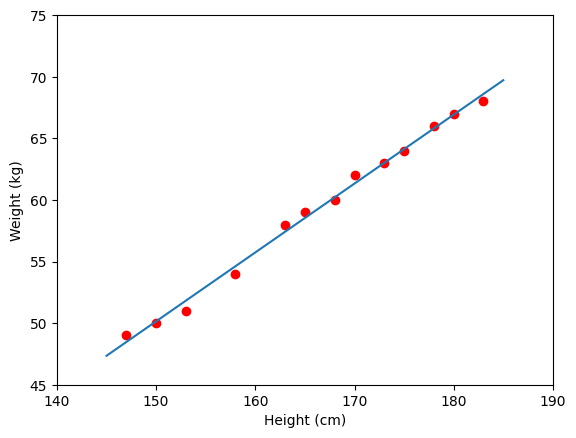

In [ ]:
# Vẽ đường dự đoán
plt.plot(X.T, y.T, 'ro')
plt.plot(x0, y0)
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Kiểm thử với data test
y1 = w_1 * 155 + w_0
print('y1', y1)
y2 = w_1 * 160 + w_0
print('y2', y2)

print('Dự đoán cân nặng người có chiều cao 155', y1)
print('Dự đoán cân nặng người có chiều cao 160', y2)

y1 52.94135889483995
y2 55.73738370453832
Dự đoán cân nặng người có chiều cao 155 52.94135889483995
Dự đoán cân nặng người có chiều cao 160 55.73738370453832


In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# fit model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(Xbar, y)

# So sánh 2 KQ
print('Nghiệm tìm được bằng sklearn', regr.coef_)
print('Nghiệm tìm được bằng công thức', w.T)

Nghiệm tìm được bằng sklearn [[-33.73541021   0.55920496]]
Nghiệm tìm được bằng công thức [[-33.73541021   0.55920496]]


In [ ]:
# Xây dựng mô hình hồi quy tuyến tính cho bài toán dự đoán huyết áp

do_tuoi = np.array([[39, 36, 45, 47, 65, 46, 67, 42, 57, 56, 64, 56, 69, 34, 42]]).T
huyet_ap = np.array([[144, 136, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110, 128]]).T

print('Độ tuổi', do_tuoi.shape)
print('Huyết áp', huyet_ap.shape)

Độ tuổi (15, 1)
Huyết áp (15, 1)


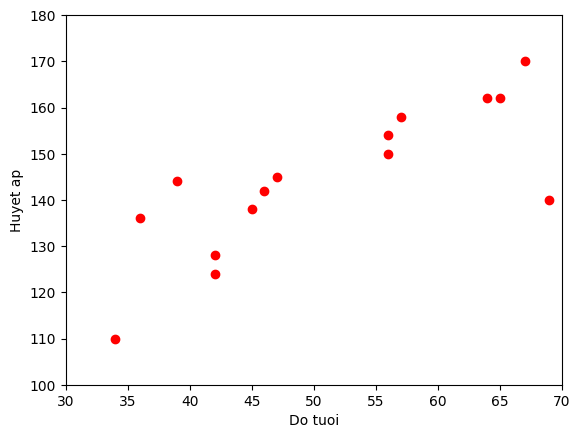

In [ ]:
# Trực quan hóa dữ liệu
plt.plot(do_tuoi, huyet_ap, 'ro')
plt.axis([30, 70, 100, 180])
plt.xlabel('Do tuoi')
plt.ylabel('Huyet ap')
plt.show()

In [ ]:
# Xây dựng trục X
one = np.ones((do_tuoi.shape[0], 1))
do_tuoi_Xbar = np.concatenate((one, do_tuoi), axis=1)

In [ ]:
# Dựng mô hình
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(do_tuoi_Xbar, huyet_ap)

print('Nghiệm tìm được bằng sklearn', regr.coef_)

Nghiệm tìm được bằng sklearn [[89.76120332  1.06742739]]


#### Xây dựng mô hình hồi quy tuyến tính cho bài toán dự đoán giá nhà với dữ liệu gửi kèm.

In [ ]:
df = pd.read_csv('Real estate.csv', delimiter=',')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

<Axes: >

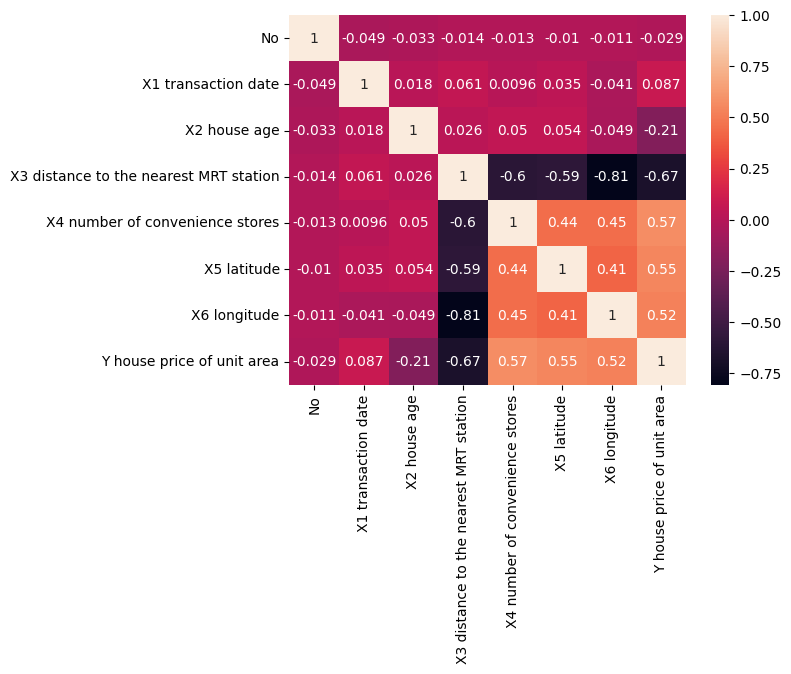

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
x = df.drop(['Y house price of unit area', 'No', 'X1 transaction date'], axis=1)
y = df[['Y house price of unit area']]

In [ ]:
print('X', x.shape)
print('Y', y.shape)

X (414, 5)
Y (414, 1)


In [ ]:
regr_model = linear_model.LinearRegression()
regr_model.fit(x, y)

LinearRegression()

In [ ]:
regr_model.coef_

array([[-2.68916833e-01, -4.25908898e-03,  1.16302048e+00,
         2.37767191e+02, -7.80545273e+00]])

In [ ]:
regr_model.score(x, y)

0.5711617064827472

In [ ]:
regr_model.predict([[32.0,84.87882,	8,	24.98298,	121.56024]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[46.04247439]])